In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import joblib
from glob import glob
from tqdm import tqdm
try:
    import csiborgtools
except ModuleNotFoundError:
    print("not found")
    import sys
    sys.path.append("../")
    import csiborgtools


%matplotlib notebook
%load_ext autoreload
%autoreload 2

not found


In [16]:
import yaml

In [71]:
with open('../scripts/run_knn_auto.yml', 'r') as file:
    x = yaml.safe_load(file)

In [73]:
x["rmin"]

0.1

In [82]:
paths = csiborgtools.read.CSiBORGPaths()
knnreader = csiborgtools.read.kNNCDFReader()


ics = paths.ic_ids(False)

In [77]:
cat = csiborgtools.read.HaloCatalogue(7444, paths)

In [88]:
from tqdm import trange
x = np.full((len(ics), 3), np.nan)
for i in trange(len(ics)):
    cat = csiborgtools.read.HaloCatalogue(ics[i], paths, max_dist=155 / 0.705)
    for j, th in enumerate([1e12, 1e13, 1e14]):
        mask = cat["totpartmass"] > th
        x[i, j] = np.nanmedian(cat["lambda200c"][mask])

100%|██████████| 101/101 [03:32<00:00,  2.11s/it]


In [93]:
np.mean(x[:, 2]), np.std(x[:, 2])

(0.10675702922710098, 0.005264103481294404)

In [ ]:
np.nanmedian()

<IPython.core.display.Javascript object>


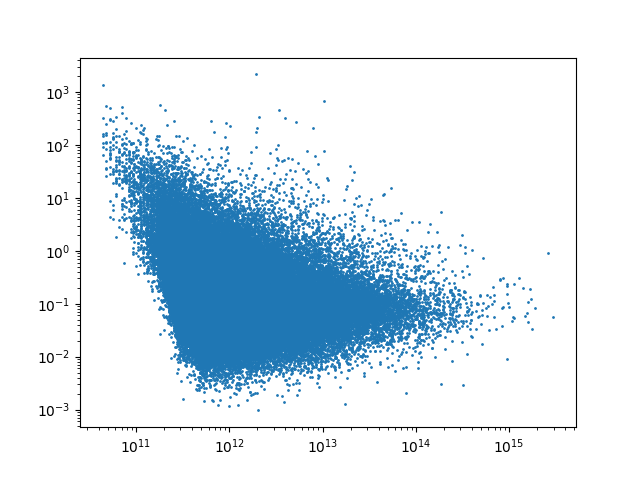

In [15]:
plt.figure()

plt.scatter(cat["m200"], cat["lambda200c"], s=1)

plt.xscale("log")
plt.yscale("log")


plt.show()

In [142]:
files = glob("/mnt/extraspace/rstiskalek/csiborg/knn/auto/*")

ks = [0, 1, 2, 3, 4, 5, 6, 7]
rs, cdf, thresholds = knnreader.read(files, ks, rmin=0.01, rmax=100)

100%|██████████| 101/101 [00:01<00:00, 76.37it/s]


In [143]:
pk = knnreader.prob_kvolume(cdf, rs, True)

<IPython.core.display.Javascript object>


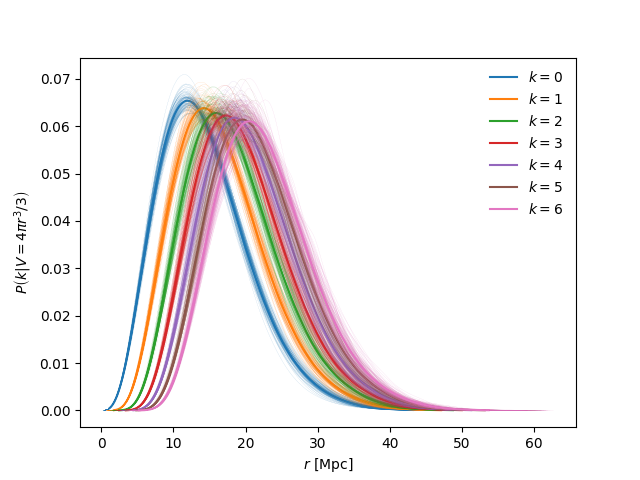

In [147]:
cols = plt.rcParams["axes.prop_cycle"].by_key()["color"]

plt.figure()
n = 1
for k in range(7):
    plt.plot(rs, np.mean(pk[:, n, k, :], axis=0), c=cols[k], label=r"$k = {}$".format(k))
    for i in range(101):
        plt.plot(rs, pk[i, n, k, :], c=cols[k], lw=0.05)

plt.legend(frameon=False)
plt.xlabel(r"$r~\left[\mathrm{Mpc}\right]$")
plt.ylabel(r"$P\left(k | V = 4 \pi r^3 / 3\right)$")
# plt.savefig("../plots/test.png", dpi=450)
plt.show()

In [ ]:
n = 2
k = 1

x = cdf[:, n, k - 1, :] - cdf[:, n, k, :]

plt.figure()
for i in range(101):
    plt.plot(rs, x[i, :])

plt.xscale("log")

plt.show()

In [ ]:
files = knnreader.cross_files(7444, "/mnt/extraspace/rstiskalek/csiborg/knn/cross/")

In [ ]:
ks = [0, 1, 2, 3, 4, 5, 6, 7]
rs, cross, threshold = knnreader.read(files, ks, rmin=0.5)

In [ ]:
n = 0
k = 1

plt.figure()
for i in range(100):
    plt.plot(rs, cross[i, n, k - 1, :] - cross[i, n, k, :])

plt.xscale("log")
plt.axvline(2.65 / 0.705)
plt.show()

In [ ]:
"/mnt/extraspace/hdesmond/ramses_out_7444/output_00950/clump_00950.dat"

In [ ]:
cat1 = csiborgtools.read.HaloCatalogue(7444, min_mass=1e13, max_dist=155 / 0.705)
cat2 = csiborgtools.read.HaloCatalogue(7468, min_mass=1e13, max_dist=155 / 0.705)

In [ ]:
knncdf = csiborgtools.match.kNN_CDF()


knn1 = NearestNeighbors()
knn1.fit(cat1.positions)

knn2 = NearestNeighbors()
knn2.fit(cat2.positions)

# rs, cdf = knncdf(knn, nneighbours=2, Rmax=155 / 0.705, rmin=0.01, rmax=100,
#                   nsamples=int(1e6), neval=int(1e4), random_state=42, batch_size=int(1e6))

In [ ]:
!ls /mnt/extraspace/rstiskalek/csiborg/knn/cross/knncdf_7444_7468.p

In [ ]:
from glob import glob

In [ ]:
files = glob("/mnt/extraspace/rstiskalek/csiborg/knn/cross/*")

In [ ]:
cols = plt.rcParams["axes.prop_cycle"].by_key()["color"]

plt.figure()
for file in files:
    d = joblib.load(file)
    mask = d["rs"] > 0.1
    plt.plot(d["rs"][mask], d["corr_0"][0, mask], c=cols[0], lw=0.4)

plt.xscale("log")
plt.axvline(2.65 / 0.705, lw=0.8, c="red", ls="--")
# plt.yscale("log")

plt.show()

In [ ]:
5500 / comb(5, 3)

In [ ]:
plt.figure()
plt.plot(d["rs"], d["corr_0"][1, :])
plt.plot(d["rs"], d["corr_1"][1, :])
plt.plot(d["rs"], d["corr_2"][1, :])

# plt.yscale("log")
# plt.xscale("log")
plt.show()

In [ ]:
# rs, cdf = knncdf(knn1, nneighbours=2, Rmax=155 / 0.705, rmin=0.01, rmax=100,
#                  nsamples=int(1e6), neval=int(1e4), random_state=42, batch_size=int(1e6))

rs, cdf0, cdf1, joint_cdf = knncdf.joint(knn1, knn2, nneighbours=8, Rmax=155 / 0.705,
                                         rmin=0.01, rmax=100, nsamples=int(1e6), neval=int(1e4),
                                         random_state=42, batch_size=int(1e6))

In [ ]:
cdf0 = knncdf.clipped_cdf(cdf0)
cdf1 = knncdf.clipped_cdf(cdf1)
joint_cdf = knncdf.clipped_cdf(joint_cdf)

In [ ]:
corr = knncdf.joint_to_corr(cdf0, cdf1, joint_cdf)

In [ ]:
ics = [7444, 7468, 7492, 7516, 7540, 7564, 7588, 7612, 7636, 7660, 7684,
       7708, 7732, 7756, 7780, 7804, 7828, 7852, 7876, 7900, 7924, 7948,
       7972, 7996, 8020, 8044, 8068, 8092, 8116, 8140, 8164, 8188, 8212,
       8236, 8260, 8284, 8308, 8332, 8356, 8380, 8404, 8428, 8452, 8476,
       8500, 8524, 8548, 8572, 8596, 8620, 8644, 8668, 8692, 8716, 8740,
       8764, 8788, 8812, 8836, 8860, 8884, 8908, 8932, 8956, 8980, 9004,
       9028, 9052, 9076, 9100, 9124, 9148, 9172, 9196, 9220, 9244, 9268,
       9292, 9316, 9340, 9364, 9388, 9412, 9436, 9460, 9484, 9508, 9532,
       9556, 9580, 9604, 9628, 9652, 9676, 9700, 9724, 9748, 9772, 9796,
       9820, 9844]

In [ ]:
from scipy.special import comb

from itertools import combinations
# for subset in itertools.combinations(stuff, L):

In [ ]:
list(combinations(ics, 2))

In [ ]:
comb()

In [ ]:
plt.figure()

# plt.plot(rs, knncdf.peaked_cdf(cdf0[0, :]))
# plt.plot(rs, knncdf.peaked_cdf(cdf1[0, :]))
# plt.plot(rs, knncdf.peaked_cdf(joint_cdf[0, :]))
for i in range(8):
    plt.plot(rs, corr[i, :])


# plt.yscale("log")
# plt.xscale("log")
plt.axvline(2.65 / 0.705, c="red", ls="--")

plt.show()

In [ ]:
dist1, dist2 = knncdf.joint(knn1, knn2, nneighbours=2, Rmax=155 / 0.705, rmin=0.01, rmax=100,
             nsamples=int(1e6), neval=int(1e4), random_state=42, batch_size=int(1e6))

In [ ]:
plt.figure()
plt.plot(rs, knncdf.peaked_cdf(cdf[0, :]))

plt.yscale("log" )
plt.xscale("log")
plt.show()

In [ ]:
mask

In [ ]:
dist

In [ ]:
m1 = (rs > 1) & (rs < 35)

fig, axs = plt.subplots(ncols=3, figsize=(6.4 * 1.5, 4.8), sharey=True)
fig.subplots_adjust(wspace=0)
for k in range(3):
    for n in range(len(ics)):
        m = m1 & (cdfs[n, k, :] > 1e-3)
        axs[k].plot(rs[m], cdfs[n, k, m], c="black", lw=0.05)

    axs[k].set_xscale("log")
    axs[k].set_yscale("log")
    axs[k].set_title(r"$k = {}$".format(k))
    axs[k].set_xlabel(r"$r~\left[\mathrm{Mpc}\right]$")

axs[0].set_ylabel(r"Peaked CDF")

plt.tight_layout(w_pad=0)
fig.savefig("../plots/peaked_cdf.png", dpi=450)
fig.show()

In [ ]:
m = (rs > 0.5) & (rs < 35)

fig, axs = plt.subplots(ncols=3, figsize=(6.4 * 1.5, 4.8), sharey=True)
fig.subplots_adjust(wspace=0)
for k in range(3):
    mu = np.nanmean(cdfs[:, k, :], axis=0)

    for n in range(len(ics)):
        axs[k].plot(rs[m], (cdfs[n, k, :] / mu)[m], c="black", lw=0.1)

    axs[k].set_ylim(0.5, 1.5)
    axs[k].axhline(1, ls="--", c="red", zorder=0)
    axs[k].axvline(2.65 / 0.705, ls="--", c="red", zorder=0)
    axs[k].set_xscale("log")
    axs[k].set_xlabel(r"$r~\left[\mathrm{Mpc}\right]$")
    axs[k].set_title(r"$k = {}$".format(k))
    
axs[0].set_ylabel(r"Relative peaked CDF")
plt.tight_layout(w_pad=0)
fig.savefig("../plots/peaked_cdf_ratios.png", dpi=450)
fig.show()

In [ ]:
plt.figure()
k = 2
mu = np.nanmean(cdfs[:, k, :], axis=0)
# plt.plot(rs, mu, c="black")
for i in range(len(ics)):
    plt.plot(rs, cdfs[i, k, :] / mu)


plt.ylim(0.75, 1.25)
plt.axhline(1, ls="--", c="black")
plt.xscale("log")
# plt.yscale("log")
plt.show()

In [ ]:
x.shape

In [ ]:
dist0, __ = knn0.kneighbors(X, 3)
distx, __ = knnx.kneighbors(X, 3)

In [ ]:
x0, y0 = knncdf.peaked_cdf_from_samples(dist0[:, 0], 0.5, 20, neval=10000)
xx, yx = knncdf.peaked_cdf_from_samples(distx[:, 0], 0.5, 20, neval=10000)

In [ ]:
distx[:, 0].min()

In [ ]:
plt.figure()
plt.plot(x0, y0)
plt.plot(xx, yx)

plt.yscale("log")
plt.xscale("log")
plt.show()

In [ ]:
plt.figure()

for i in range(3):
    plt.plot(*knncdf.cdf_from_samples(dist0[:, i], 1, 25))
    plt.plot(*knncdf.cdf_from_samples(distx[:, i], 1, 25))

# plt.xlim(0.5, 25)

plt.yscale("log")
plt.xscale("log")
plt.xlabel(r"$r~\left[\mathrm{Mpc}\right]$")



plt.show()

In [ ]:
x = dist[:, 0]
q = np.linspace(0, 100, int(x.size / 5))

p = np.percentile(x, q)

In [ ]:
y = np.sort(x)

yy = np.arange(y.size) / y.size

In [ ]:
plt.figure()
plt.plot(p, q / 100)

plt.plot(y, yy)

# plt.yscale("log")
plt.show()

In [ ]:
plt.figure()
plt.hist(dist[:, 0], bins="auto", histtype="step")
plt.hist(dist[:, 1], bins="auto", histtype="step")
plt.hist(dist[:, 2], bins="auto", histtype="step")

plt.show()

In [ ]:
plt.figure()
plt.hist(cat0["dec"], bins="auto")

plt.show()

In [ ]:
gen = np.random.default_rng(22)

In [ ]:
gen.normal()

In [ ]:
theta = np.linspace( t, np.pi, 100)

plt.figure()
plt.plot(theta, np.sin(theta))
plt.show()

In [ ]:
X = np.array([-3.9514747, -0.6966991,  2.97158]).reshape(1, -1)

X

In [ ]:
dist, indxs = knn0.kneighbors(X, n_neighbors=1)

dist, indxs

In [ ]:
cat0.positions[indxs]